In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Loading data

In [2]:
confirmed_cases_5_1_2020_df = pd.read_csv('confirmed_cases_5_1_2020.csv')
confirmed_cases_4_1_2021_df = pd.read_csv('confirmed_cases_4_1_2021.csv')
confirmed_cases_10_9_2021_df = pd.read_csv('confirmed_cases_10_9_2021.csv')
confirmed_deaths_5_1_2020_df = pd.read_csv('confirmed_deaths_5_1_2020.csv')
confirmed_deaths_4_1_2021_df = pd.read_csv('confirmed_deaths_4_1_2021.csv')
confirmed_deaths_10_9_2021_df = pd.read_csv('confirmed_deaths_10_9_2021.csv')

confirmed_cases_dfs = [confirmed_cases_5_1_2020_df, confirmed_cases_4_1_2021_df, confirmed_cases_10_9_2021_df]
confirmed_death_dfs = [confirmed_deaths_5_1_2020_df, confirmed_cases_4_1_2021_df, confirmed_cases_10_9_2021_df]

# Data Descriptions of DataSets

In [3]:
confirmed_cases_5_1_2020_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases
count,2264.000000,2264.000000,2264.000000,2264.0,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2264.000000
mean,31831.292403,39.000967,-94.036314,0.0,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,436.202297
std,14659.669346,5.294743,12.506473,0.0,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,2676.874272
min,1001.000000,19.601212,-174.159600,0.0,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000
25%,20108.500000,35.267606,-100.423225,0.0,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,3.000000
50%,30108.000000,39.645633,-92.526546,0.0,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,16.000000
75%,47027.500000,42.917444,-85.720982,0.0,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,88.000000
max,56045.000000,61.149982,-67.628135,0.0,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,53936.000000


In [4]:
confirmed_cases_4_1_2021_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases
count,2264.000000,2264.000000,2264.000000,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2.264000e+03
mean,31831.292403,39.000967,-94.036314,4.306236e+06,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,1.061127e+04
std,14659.669346,5.294743,12.506473,4.180747e+06,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,3.897240e+04
min,1001.000000,19.601212,-174.159600,4.097900e+04,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000e+00
25%,20108.500000,35.267606,-100.423225,1.290992e+06,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,8.917500e+02
50%,30108.000000,39.645633,-92.526546,2.751928e+06,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,2.482500e+03
75%,47027.500000,42.917444,-85.720982,5.932882e+06,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,6.339500e+03
max,56045.000000,61.149982,-67.628135,1.822341e+07,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,1.220256e+06


In [5]:
confirmed_cases_10_9_2021_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases
count,2264.000000,2264.000000,2264.000000,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2.264000e+03
mean,31831.292403,39.000967,-94.036314,1.159381e+07,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,1.531532e+04
std,14659.669346,5.294743,12.506473,1.205044e+07,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,5.106216e+04
min,1001.000000,19.601212,-174.159600,5.368840e+05,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000e+00
25%,20108.500000,35.267606,-100.423225,3.157449e+06,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,1.352000e+03
50%,30108.000000,39.645633,-92.526546,6.908981e+06,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,3.764000e+03
75%,47027.500000,42.917444,-85.720982,1.562218e+07,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,1.005200e+04
max,56045.000000,61.149982,-67.628135,5.172215e+07,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,1.469790e+06


In [6]:
confirmed_deaths_5_1_2020_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases,deaths
count,2264.000000,2264.000000,2264.000000,2264.0,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2264.000000,2264.000000
mean,31831.292403,39.000967,-94.036314,0.0,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,436.202297,25.264134
std,14659.669346,5.294743,12.506473,0.0,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,2676.874272,191.173780
min,1001.000000,19.601212,-174.159600,0.0,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000,0.000000
25%,20108.500000,35.267606,-100.423225,0.0,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,3.000000,0.000000
50%,30108.000000,39.645633,-92.526546,0.0,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,16.000000,0.000000
75%,47027.500000,42.917444,-85.720982,0.0,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,88.000000,3.000000
max,56045.000000,61.149982,-67.628135,0.0,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,53936.000000,4786.000000


In [7]:
confirmed_deaths_4_1_2021_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases,deaths
count,2264.000000,2264.000000,2264.000000,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2.264000e+03,2.264000e+03
mean,31831.292403,39.000967,-94.036314,4.306236e+06,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,1.061127e+04,2.502303e+04
std,14659.669346,5.294743,12.506473,4.180747e+06,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,3.897240e+04,5.769417e+04
min,1001.000000,19.601212,-174.159600,4.097900e+04,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000e+00,0.000000e+00
25%,20108.500000,35.267606,-100.423225,1.290992e+06,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,8.917500e+02,2.934750e+03
50%,30108.000000,39.645633,-92.526546,2.751928e+06,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,2.482500e+03,8.029000e+03
75%,47027.500000,42.917444,-85.720982,5.932882e+06,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,6.339500e+03,2.090075e+04
max,56045.000000,61.149982,-67.628135,1.822341e+07,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,1.220256e+06,1.145530e+06


In [8]:
confirmed_deaths_10_9_2021_df.describe()

,FIPS,Lat,Long_,vaccine_doses_administered_in_state,white_pop,black_pop,asian_pop,hisp_pop,Population,pop per sq mi,democrat_votes,republican_votes,democrat_percent,republican_percent,confirmed_cases,deaths
count,2264.000000,2264.000000,2264.000000,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2.264000e+03,2264.000000,2.264000e+03,2.264000e+03,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,31831.292403,39.000967,-94.036314,1.159381e+07,9.011237e+04,1.330966e+04,7.142916e+03,2.342336e+04,1.162601e+05,258.360557,2.898562e+04,2.586063e+04,32.742339,65.421268,1.531532e+04,241.595848
std,14659.669346,5.294743,12.506473,1.205044e+07,2.611918e+05,5.874267e+04,4.849089e+04,1.469708e+05,3.705810e+05,1968.373832,1.083191e+05,5.783175e+04,16.036041,16.258023,5.106216e+04,879.220669
min,1001.000000,19.601212,-174.159600,5.368840e+05,1.600000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.690000e+02,0.100000,4.000000e+00,6.000000e+01,3.090909,12.144909,0.000000e+00,0.000000
25%,20108.500000,35.267606,-100.423225,3.157449e+06,8.491750e+03,1.300000e+02,4.400000e+01,3.630000e+02,1.001725e+04,12.500000,1.157000e+03,3.484500e+03,20.499849,55.780753,1.352000e+03,21.000000
50%,30108.000000,39.645633,-92.526546,6.908981e+06,2.373300e+04,7.660000e+02,1.600000e+02,1.194000e+03,2.681450e+04,40.300000,3.743500e+03,8.581000e+03,29.084997,68.919022,3.764000e+03,61.000000
75%,47027.500000,42.917444,-85.720982,1.562218e+07,6.378775e+04,5.001500e+03,8.270000e+02,6.088750e+03,7.360300e+04,108.250000,1.298550e+04,2.191750e+04,42.268696,77.927926,1.005200e+04,157.000000
max,56045.000000,61.149982,-67.628135,5.172215e+07,7.098309e+06,1.116718e+06,1.445032e+06,4.881970e+06,1.003911e+07,69468.400000,3.028885e+06,1.145530e+06,85.976005,96.181818,1.469790e+06,26308.000000


# Plots of different features vs target variable

### 5/1/2020 Confirmed Cases Plots

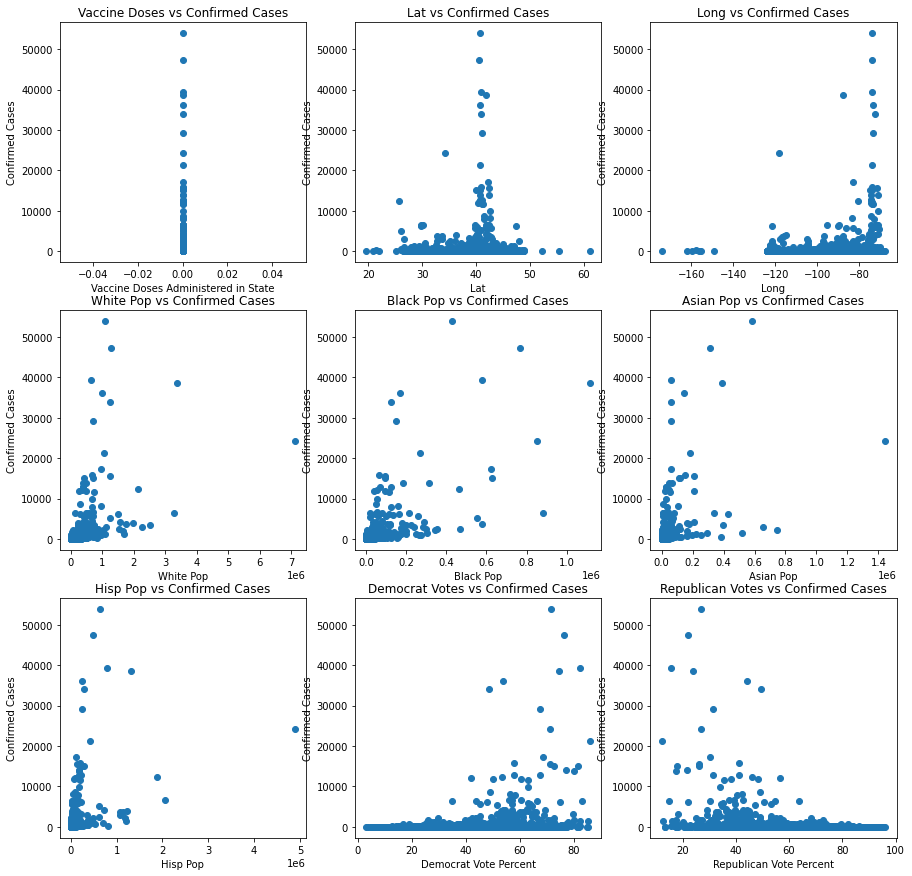

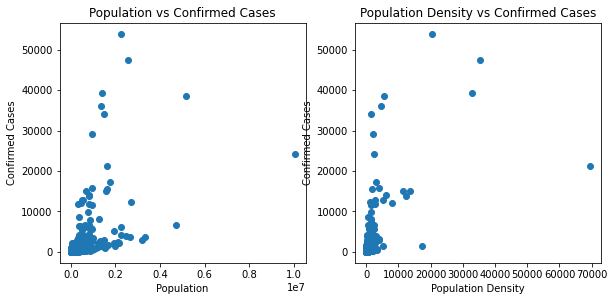

In [9]:
def plot_vaccine_doses_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(331)
    subplot.set_xlabel('Vaccine Doses Administered in State')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Vaccine Doses vs Confirmed Cases")
    subplot.scatter(df.vaccine_doses_administered_in_state, df.confirmed_cases)

def plot_lat_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(332)
    subplot.set_xlabel('Lat')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Lat vs Confirmed Cases")
    subplot.scatter(df.Lat, df.confirmed_cases)

def plot_long_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(333)
    subplot.set_xlabel('Long')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Long vs Confirmed Cases")
    subplot.scatter(df.Long_, df.confirmed_cases)

def white_pop_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(334)
    subplot.set_xlabel('White Pop')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("White Pop vs Confirmed Cases")
    subplot.scatter(df.white_pop, df.confirmed_cases)

def black_pop_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(335)
    subplot.set_xlabel('Black Pop')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Black Pop vs Confirmed Cases")
    subplot.scatter(df.black_pop, df.confirmed_cases)

def asian_pop_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(336)
    subplot.set_xlabel('Asian Pop')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Asian Pop vs Confirmed Cases")
    subplot.scatter(df.asian_pop, df.confirmed_cases)

def hisp_pop_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(337)
    subplot.set_xlabel('Hisp Pop')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Hisp Pop vs Confirmed Cases")
    subplot.scatter(df.hisp_pop, df.confirmed_cases)

def democrat_percent_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(338)
    subplot.set_xlabel('Democrat Vote Percent')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Democrat Votes vs Confirmed Cases")
    subplot.scatter(df.democrat_percent, df.confirmed_cases)

def republican_percent_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(339)
    subplot.set_xlabel('Republican Vote Percent')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Republican Votes vs Confirmed Cases")
    subplot.scatter(df.republican_percent, df.confirmed_cases)

def population_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(331)
    subplot.set_xlabel('Population')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Population vs Confirmed Cases")
    subplot.scatter(df.Population, df.confirmed_cases)

def population_density_vs_confirmed_cases(fig, df):
    subplot = fig.add_subplot(332)
    subplot.set_xlabel('Population Density')
    subplot.set_ylabel('Confirmed Cases')
    subplot.set_title("Population Density vs Confirmed Cases")
    subplot.scatter(df['pop per sq mi'], df.confirmed_cases)

fig_5_1_2020_confirmed_cases = plt.figure(figsize=(15, 15))
fig_5_1_2020_confirmed_cases_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
plot_lat_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
plot_long_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
white_pop_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
black_pop_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
asian_pop_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
hisp_pop_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
democrat_percent_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
republican_percent_vs_confirmed_cases(fig_5_1_2020_confirmed_cases, confirmed_cases_5_1_2020_df)
population_vs_confirmed_cases(fig_5_1_2020_confirmed_cases_2, confirmed_cases_5_1_2020_df)
population_density_vs_confirmed_cases(fig_5_1_2020_confirmed_cases_2, confirmed_cases_5_1_2020_df)

### 4/1/2021 Confirmed Cases Plots

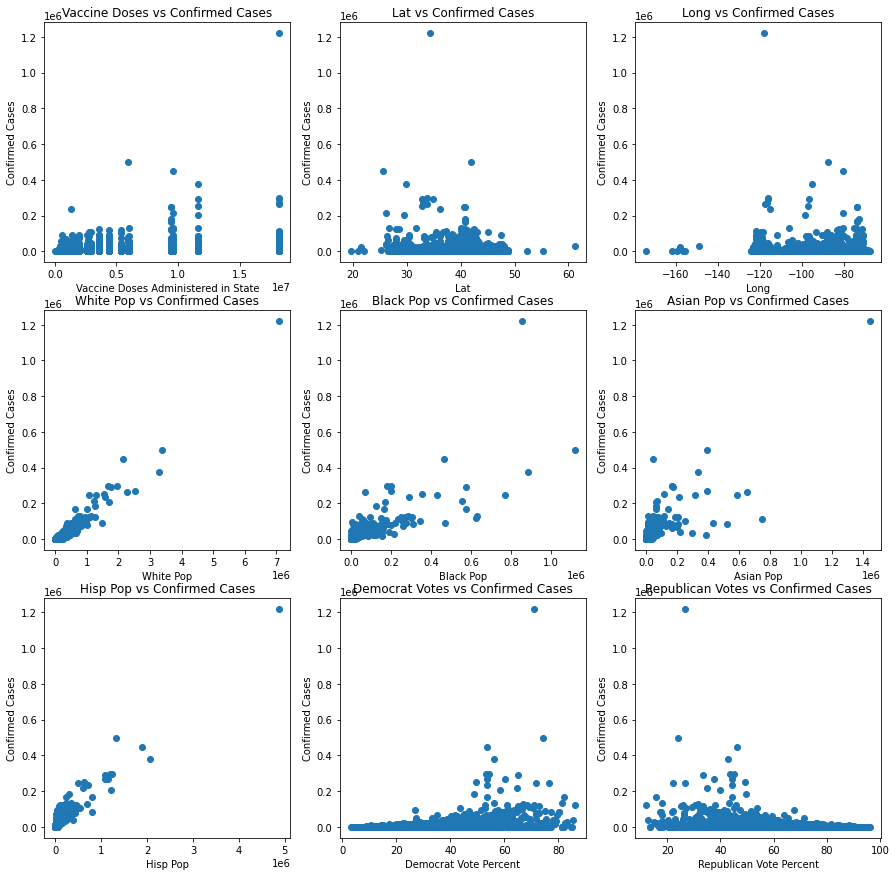

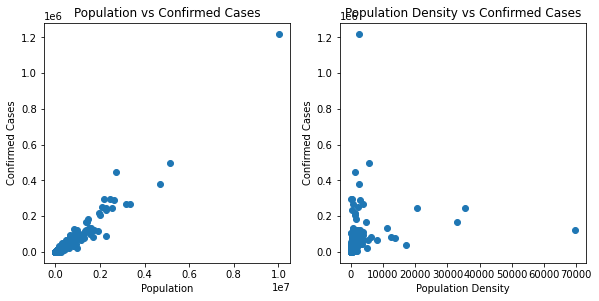

In [10]:
fig_4_1_2021_confirmed_cases = plt.figure(figsize=(15, 15))
fig_4_1_2021_confirmed_cases_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
plot_lat_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
plot_long_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
white_pop_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
black_pop_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
asian_pop_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
hisp_pop_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
democrat_percent_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
republican_percent_vs_confirmed_cases(fig_4_1_2021_confirmed_cases, confirmed_cases_4_1_2021_df)
population_vs_confirmed_cases(fig_4_1_2021_confirmed_cases_2, confirmed_cases_4_1_2021_df)
population_density_vs_confirmed_cases(fig_4_1_2021_confirmed_cases_2, confirmed_cases_4_1_2021_df)

### 10/9/2021 Confirmed Cases Plots

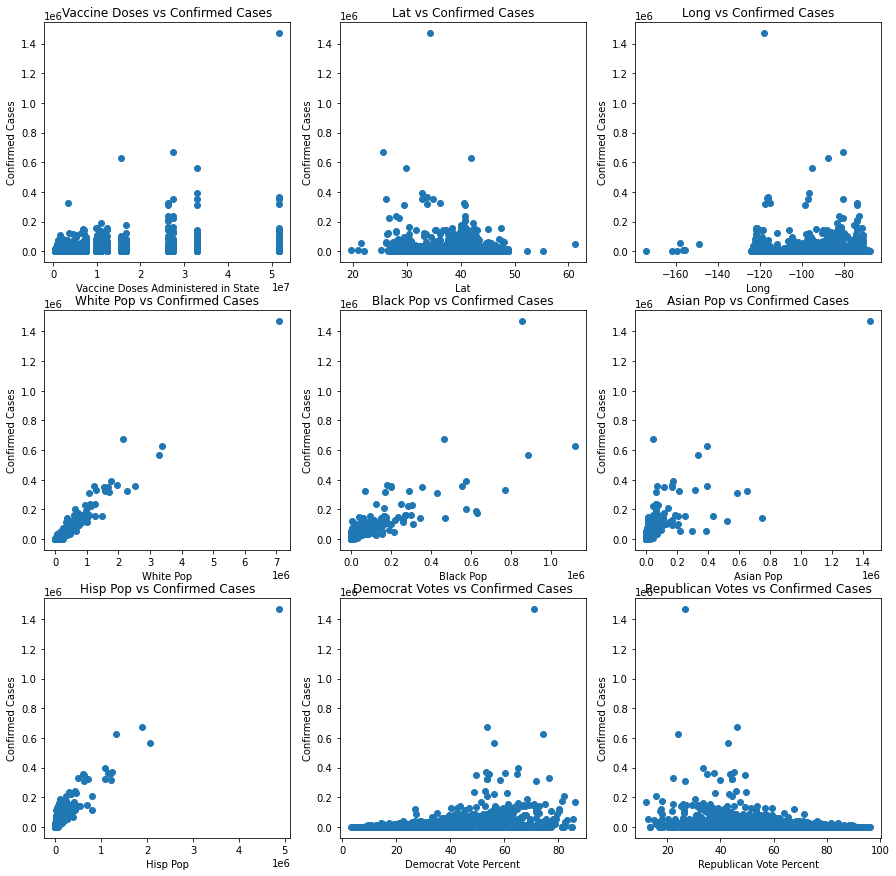

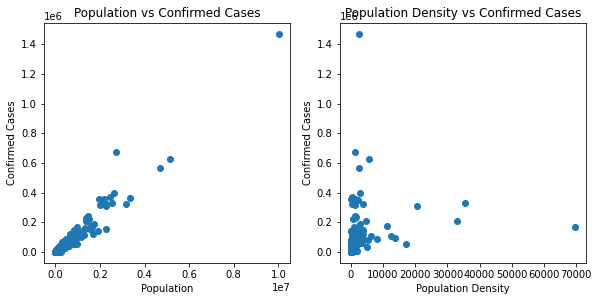

In [11]:
fig_10_9_2021_confirmed_cases = plt.figure(figsize=(15, 15))
fig_10_9_2021_confirmed_cases_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
plot_lat_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
plot_long_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
white_pop_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
black_pop_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
asian_pop_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
hisp_pop_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
democrat_percent_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
republican_percent_vs_confirmed_cases(fig_10_9_2021_confirmed_cases, confirmed_cases_10_9_2021_df)
population_vs_confirmed_cases(fig_10_9_2021_confirmed_cases_2, confirmed_cases_10_9_2021_df)
population_density_vs_confirmed_cases(fig_10_9_2021_confirmed_cases_2, confirmed_cases_10_9_2021_df)

### 5/1/2020 Confirmed Death Plots

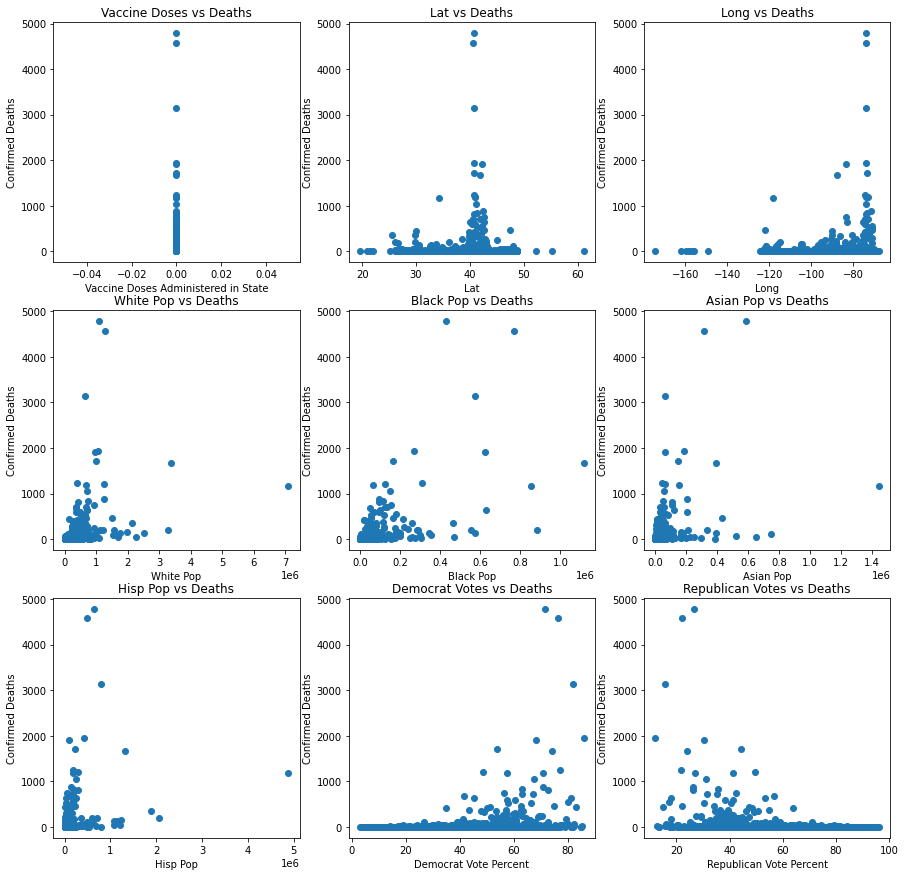

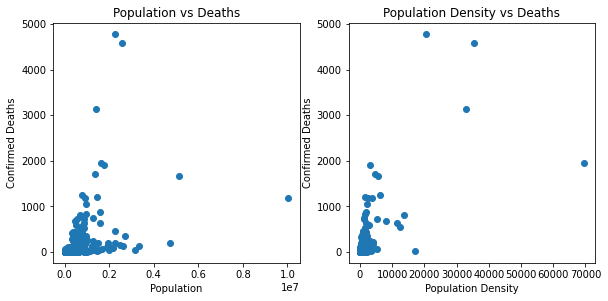

In [12]:
def plot_vaccine_doses_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(331)
    subplot.set_xlabel('Vaccine Doses Administered in State')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Vaccine Doses vs Deaths")
    subplot.scatter(df.vaccine_doses_administered_in_state, df.deaths)

def plot_lat_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(332)
    subplot.set_xlabel('Lat')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Lat vs Deaths")
    subplot.scatter(df.Lat, df.deaths)

def plot_long_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(333)
    subplot.set_xlabel('Long')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Long vs Deaths")
    subplot.scatter(df.Long_, df.deaths)

def white_pop_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(334)
    subplot.set_xlabel('White Pop')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("White Pop vs Deaths")
    subplot.scatter(df.white_pop, df.deaths)

def black_pop_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(335)
    subplot.set_xlabel('Black Pop')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Black Pop vs Deaths")
    subplot.scatter(df.black_pop, df.deaths)

def asian_pop_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(336)
    subplot.set_xlabel('Asian Pop')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Asian Pop vs Deaths")
    subplot.scatter(df.asian_pop, df.deaths)

def hisp_pop_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(337)
    subplot.set_xlabel('Hisp Pop')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Hisp Pop vs Deaths")
    subplot.scatter(df.hisp_pop, df.deaths)

def democrat_percent_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(338)
    subplot.set_xlabel('Democrat Vote Percent')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Democrat Votes vs Deaths")
    subplot.scatter(df.democrat_percent, df.deaths)

def republican_percent_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(339)
    subplot.set_xlabel('Republican Vote Percent')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Republican Votes vs Deaths")
    subplot.scatter(df.republican_percent, df.deaths)

def population_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(331)
    subplot.set_xlabel('Population')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Population vs Deaths")
    subplot.scatter(df.Population, df.deaths)

def population_density_vs_confirmed_deaths(fig, df):
    subplot = fig.add_subplot(332)
    subplot.set_xlabel('Population Density')
    subplot.set_ylabel('Confirmed Deaths')
    subplot.set_title("Population Density vs Deaths")
    subplot.scatter(df['pop per sq mi'], df.deaths)

fig_5_1_2020_confirmed_deaths = plt.figure(figsize=(15, 15))
fig_5_1_2020_confirmed_deaths_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
plot_lat_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
plot_long_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
white_pop_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
black_pop_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
asian_pop_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
hisp_pop_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
democrat_percent_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
republican_percent_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths, confirmed_deaths_5_1_2020_df)
population_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths_2, confirmed_deaths_5_1_2020_df)
population_density_vs_confirmed_deaths(fig_5_1_2020_confirmed_deaths_2, confirmed_deaths_5_1_2020_df)

### 4/1/2021 Confirmed Death Plots

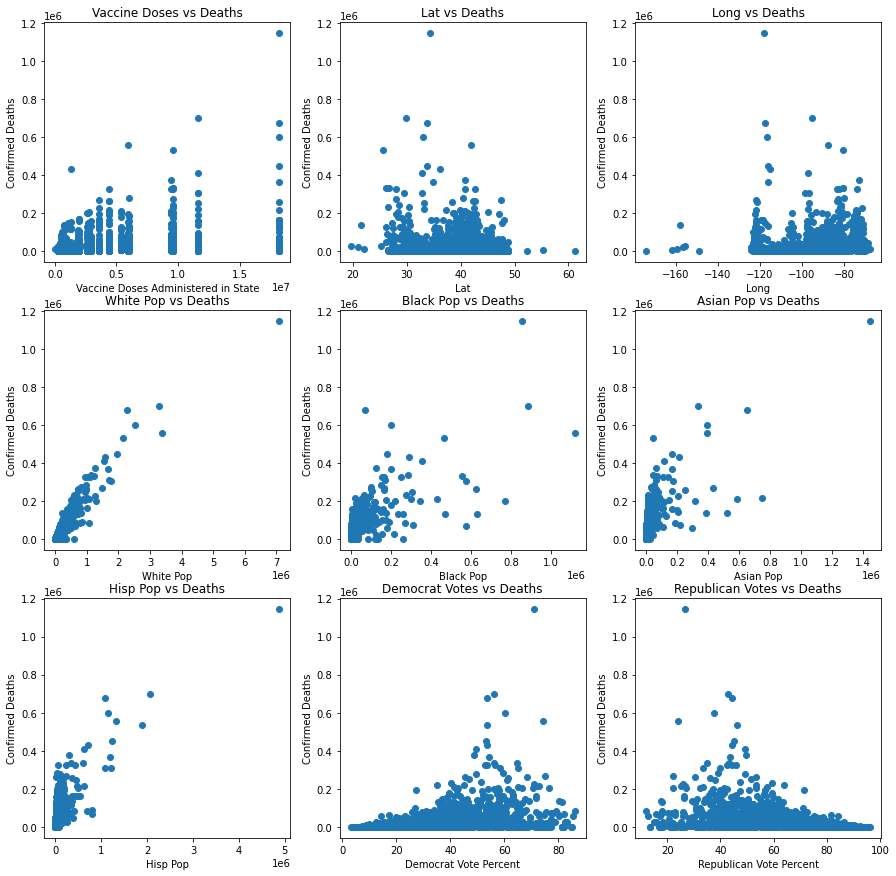

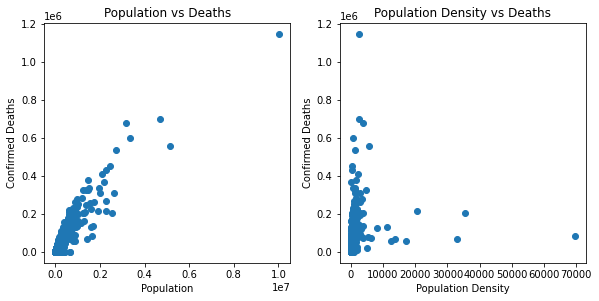

In [13]:
fig_4_1_2021_confirmed_deaths = plt.figure(figsize=(15, 15))
fig_4_1_2021_confirmed_deaths_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
plot_lat_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
plot_long_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
white_pop_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
black_pop_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
asian_pop_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
hisp_pop_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
democrat_percent_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
republican_percent_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths, confirmed_deaths_4_1_2021_df)
population_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths_2, confirmed_deaths_4_1_2021_df)
population_density_vs_confirmed_deaths(fig_4_1_2021_confirmed_deaths_2, confirmed_deaths_4_1_2021_df)

### 10/9/2021 Confirmed Death Plots

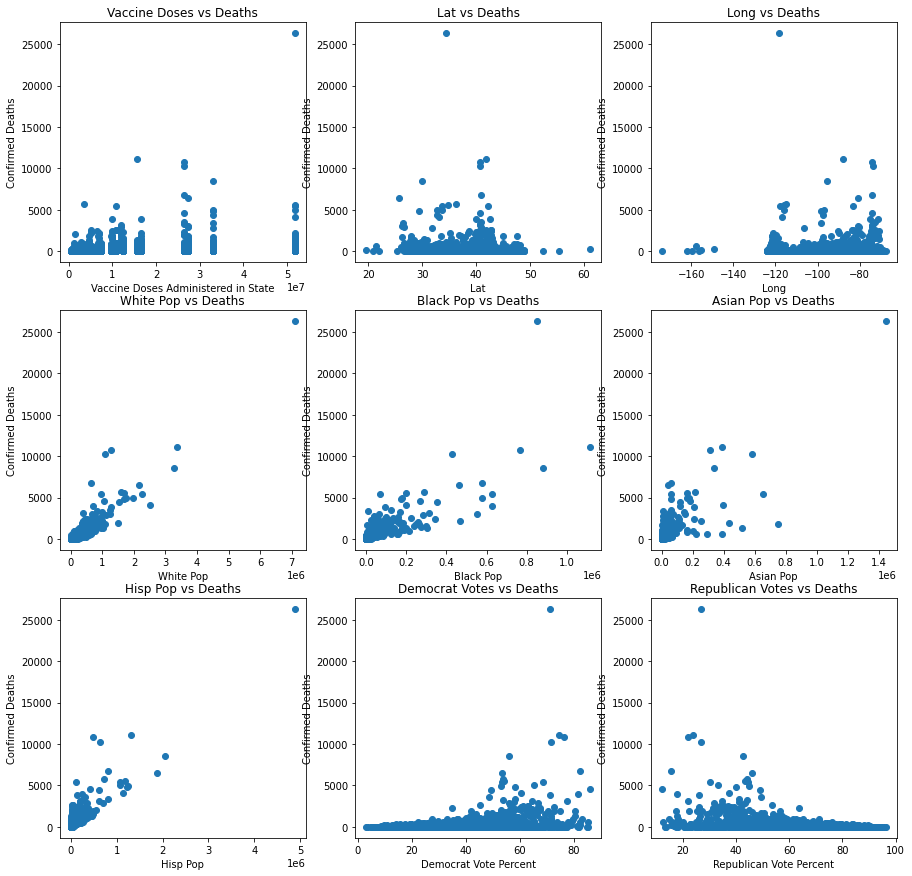

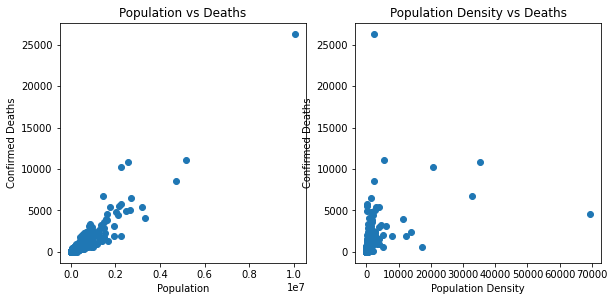

In [14]:
fig_10_9_2021_confirmed_deaths = plt.figure(figsize=(15, 15))
fig_10_9_2021_confirmed_deaths_2 = plt.figure(figsize=(15, 15))

plot_vaccine_doses_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
plot_lat_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
plot_long_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
white_pop_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
black_pop_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
asian_pop_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
hisp_pop_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
democrat_percent_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
republican_percent_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths, confirmed_deaths_10_9_2021_df)
population_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths_2, confirmed_deaths_10_9_2021_df)
population_density_vs_confirmed_deaths(fig_10_9_2021_confirmed_deaths_2, confirmed_deaths_10_9_2021_df)

## Amin's Code

In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor


In [16]:
# # Categorical boolean mask
#
# categorical_feature_mask = X_train_4_1_2021.dtypes==object
# # filter categorical columns using mask and turn it into a list
# categorical_cols = X_train_4_1_2021.columns[categorical_feature_mask].tolist()
#
# cat_columns_idx = [X_train_4_1_2021.columns.get_loc(col) for col in categorical_cols]
# # use when different features need different preprocessing
# column_trans = make_column_transformer((OneHotEncoder(), categorical_cols),remainder='passthrough')
# X_train_4_1_2021_ohe = pd.DataFrame(column_trans.fit_transform(X_train_4_1_2021),columns=column_trans.get_feature_names())
# X_test_4_1_2021_ohe = pd.DataFrame(column_trans.transform(X_test_4_1_2021),columns=column_trans.get_feature_names())
# X_train_4_1_2021_ohe

In [17]:
## Check number of missing values and NuN values in dataframe
# X_conf_4_1_2021 = X_train_4_1_2021_ohe
# # Number of columns in X_train_ohe
# print("Number of columns in X_conf_4_1_2021:\n ", len(X_conf_4_1_2021.columns))
#
# # First displays the number of non-null values in each column
# print("\nNumber of non-null values in each column:\n ", X_conf_4_1_2021.info())
#
# # Calculate the number of missing values in each column
# print("\nNumber of missing values in each column:\n ", X_conf_4_1_2021.isnull().sum())
#
# # Make a copy of X_train_ohe dataframe
# tmp_df = X_conf_4_1_2021.copy(deep=True)
#
#
# # Making pandas Dataframe named "missing_counts" which has two columns {variable_name, num_of_missing_values}
# missing_counts = pd.DataFrame(columns=["variable_name", "num_of_missing_values"])
#
# # Iterate over X_conf_4_1_2021 dataframe columns:
# for column_name in tmp_df:
#     # Making dataframe series for each column
#     df_column_tmp = tmp_df[column_name]
#     missing_counts = missing_counts.append(pd.Series([column_name, df_column_tmp.isnull().sum()],index=missing_counts.columns),
#                                            ignore_index=True)
#     if df_column_tmp.isnull().sum() != 0:
#         tmp_df[column_name].fillna(tmp_df[column_name].mean(), inplace = True)
#
# # Copy tmp_df to new dataframe X_train_ohe_imputed
# X_train_4_1_2021_ohe_imputed = tmp_df.copy(deep=True)
# #print("\nX_train_ohe_imputed:\n ", X_train_ohe_imputed)
#
#
# # Print "missing_counts" which has two columns {variable_name, num_of_missing_values}
# print("\nmissing_counts dataframe:\n ", missing_counts)

In [18]:
def drop_col (df, col):
    #df_drop = pd.DataFrame()
    temp = df.copy(deep = True)
    df_drop = temp.drop(col, axis = 1)
    return df_drop


def normalization(df_x_train, df_x_test):
    # df_std = df.copy()
    # for column in df_std.columns:
    #     df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    scaler = preprocessing.StandardScaler()
    df_x_train_normalize = scaler.fit_transform(df_x_train)

    df_x_test_normalize = scaler.transform(df_x_test)
    return df_x_train_normalize, df_x_test_normalize

def split_x_y (df):
    X =  df.iloc[:,:-1]
    y  = df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 45931)
    return X_train, X_test, y_train , y_test

def categorical_mask(df_train , df_test):

    df_train_dummi = pd.get_dummies(df_train.Province_State, prefix='Country')
    df_train_ohe = pd.concat([df_train,df_train_dummi], axis= 1)
    # df_train_ohe = df_train_ohe.drop('Province_State', axis=1)
    #
    # df_test_ohe = pd.get_dummies(df_train.Province_State, prefix='Country')
    # df_train_ohe = OneHotEncoder().fit_transform(df_train)
    return df_train_ohe

def missing_column(df):
    temp = df
    # Number of columns in X_train_ohe
    print("Number of columns in X_conf_4_1_2021:\n ", len(temp.columns))
    # First displays the number of non-null values in each column
    print("\nNumber of non-null values in each column:\n ", temp.info())

    # Calculate the number of missing values in each column
    print("\nNumber of missing values in each column:\n ", temp.isnull().sum())

    # Make a copy of X_train_ohe dataframe
    tmp_df = temp.copy(deep=True)


    # Making pandas Dataframe named "missing_counts" which has two columns {variable_name, num_of_missing_values}
    missing_counts = pd.DataFrame(columns=["variable_name", "num_of_missing_values"])

    # Iterate over X_conf_4_1_2021 dataframe columns:
    for column_name in tmp_df:
        # Making dataframe series for each column
        df_column_tmp = tmp_df[column_name]
        missing_counts = missing_counts.append(pd.Series([column_name, df_column_tmp.isnull().sum()],index=missing_counts.columns),
                                               ignore_index=True)
        if df_column_tmp.isnull().sum() != 0:
            tmp_df[column_name].fillna(tmp_df[column_name].mean(), inplace = True)

    # Copy tmp_df to new dataframe X_train_ohe_imputed
    df_ohe_imputed = tmp_df.copy(deep=True)
    #print("\nX_train_ohe_imputed:\n ", X_train_ohe_imputed)


    # Print "missing_counts" which has two columns {variable_name, num_of_missing_values}
    print("\nmissing_counts dataframe:\n ", missing_counts)
    return df_ohe_imputed

def top_related_features(df_x_train , df_y_train , number_features,  df_x_test):
    #Create dataframe from named top_df with 2 columns {variable,corr_score}
    top_df = pd.DataFrame(columns=["variable", "corr_score"])

    # Making Pandas series of top 20 highly correlated variables with respect to the target variable
    corr = abs(df_x_train.corrwith(df_y_train, method="pearson")).sort_values(ascending=False).iloc[:number_features]

    # Print a list of top 10 highly correlated variables with respect to the target variable
    # print("\nA list of top 10 highly correlated variables with respect to the target variable: ")

    for index, value in corr.items():
        top_df = top_df.append(pd.Series([index, value], index=top_df.columns), ignore_index=True)
    # print("\nPandas dataframe of top 10 highly correlated variables with respect to the target variable:\n ", top_df)


    col_list = top_df['variable'].tolist()

    # Copy X_train_ohe_imputed to temporary dataframe
    tmp = df_x_train.copy(deep=True)

    # Delete all columns from tmp dataframe except columns from col_list
    X_train_t10 = tmp.filter(col_list)
    # print("\nX_train_t20:\n ", X_train_t10_4_1_2021)
    # X_train_t20.to_csv('x_train_t20.csv')

    ###############################################
    ###############################################
    ###############################################

    # Part 2: X_test_t10
    # First create X_test_ohe_imputed
    tmp_test_df = df_x_test.copy(deep=True)

    # Making pandas Dataframe named "missing_counts_test" which has two columns {variable_name, num_of_missing_values}
    missing_counts_test = pd.DataFrame(columns=["variable_name", "num_of_missing_values"])


    # Iterate over X_test_ohe dataframe columns:
    for column_name in tmp_test_df:
        # Making dataframe series for each column
        df_column_tmp = tmp_test_df[column_name]
        missing_counts_test = missing_counts_test.append(pd.Series([column_name, df_column_tmp.isnull().sum()],index=missing_counts_test.columns),
                                                         ignore_index=True)
        if df_column_tmp.isnull().sum() != 0:
            tmp_test_df[column_name].fillna(tmp_test_df[column_name].mean(), inplace = True)

    # Copy tmp_df to new dataframe X_test_ohe-imputed
    X_test_ohe_imputed = tmp_test_df.copy(deep=True)
    # print("\nX_test_ohe_imputed:\n ", X_test_ohe_imputed)

    # Delete all columns from tmp_test_df dataframe except columns from col_list
    X_test_t10 = tmp_test_df.filter(col_list)
    # print("\nX_test_t20:\n ", X_test_t10)
    # X_test_t20.to_csv('x-test-t20.csv')

    return(X_train_t10, X_test_t10)

def rmse_func(y_true, y_predict):
    rmse_sklearn = mean_squared_error(y_true, y_predict , squared=False)
    return rmse_sklearn



In [19]:
##################### add Country_Region to the confirmed_cases_4_1_2021 dataframe
#confirmed_cases_4_1_2021_df['Country_Region'] = 'US'
#confirmed_cases_4_1_2021_df.insert(3, 'Country_Region','US')
#confirmed_cases_4_1_2021_df.to_csv('confirmed_cases_4_1_2021.csv', index = False)
#confirmed_cases_4_1_2021_df = confirmed_cases_4_1_2021_df.drop(['Unnamed: 0'],axis= 1)
#confirmed_cases_4_1_2021_df.to_csv('confirmed_cases_4_1_2021.csv', index = False)

In [24]:
df_list = [confirmed_cases_5_1_2020_df, confirmed_cases_4_1_2021_df, confirmed_cases_10_9_2021_df, confirmed_deaths_5_1_2020_df, confirmed_deaths_4_1_2021_df, confirmed_deaths_10_9_2021_df]
y_pred_lin_list = []
y_pred_sgd_list = []

rmse_lin_df = pd.DataFrame(columns=['confirmed_cases_5_1_2020_df', 'confirmed_cases_4_1_2021_df', 'confirmed_cases_10_9_2021_df',
                                'confirmed_deaths_5_1_2020_df', 'confirmed_deaths_4_1_2021_df', 'confirmed_deaths_10_9_2021_df'])

rmse_sgd_df = pd.DataFrame(columns=['confirmed_cases_5_1_2020_df', 'confirmed_cases_4_1_2021_df', 'confirmed_cases_10_9_2021_df',
                                    'confirmed_deaths_5_1_2020_df', 'confirmed_deaths_4_1_2021_df', 'confirmed_deaths_10_9_2021_df'])

# y_true_list = []
drop_column = ['FIPS', 'Admin2','Combined_Key','Country_Region', 'Province_State']

rmse_lin_list = []
rmse_sgd_list = []

for i in range(len(df_list)):
    df_drop = drop_col(df_list[i], drop_column)
    X_train, X_test, y_train , y_test = split_x_y(df_drop)
    # X_train_ohe = categorical_mask(X_train , X_test)

    # create top correlated features
    X_train_t10_corr , X_test_t10_corr = top_related_features(df_x_train=X_train , df_y_train=y_train,
                                                              number_features=10,  df_x_test=X_test)
    # print(X_train_t10_corr, X_test_t10_corr)
    X_train_t10_corr_norm, X_test_t10_corr_norm = normalization(X_train_t10_corr, X_test_t10_corr)

    # LinearRegression
    linear_model = LinearRegression()
    linear_model.fit(X_train_t10_corr_norm , y_train)
    y_predict_lin = linear_model.predict(X_test_t10_corr_norm)

    # Stochastic Gradient Decent
    sgd_model = SGDRegressor()
    sgd_model.fit(X_train_t10_corr_norm, y_train)
    y_predict_sgd = sgd_model.predict(X_test_t10_corr_norm)

    y_pred_lin_list.append(y_predict_lin)
    y_pred_sgd_list.append(y_predict_sgd)

    # RMSE_SKLEARN
    rmse_lin = rmse_func(y_test, y_predict_lin)
    rmse_lin_list.append(rmse_lin)

    rmse_sgd = rmse_func(y_test, y_predict_sgd)
    rmse_sgd_list.append(rmse_sgd)


print(rmse_lin_list)
rmse_lin_df = rmse_lin_df.append(pd.Series(rmse_lin_list, index=rmse_lin_df.columns, name='RMSE'),
                             ignore_index=False)
print(rmse_sgd_list)
rmse_sgd_df = rmse_sgd_df.append(pd.Series(rmse_sgd_list, index=rmse_sgd_df.columns, name='RMSE'),
                                 ignore_index=False)

[1849.239721790145, 13090.864548077223, 11129.279249022271, 79.25988481121536, 4657.0157929069255, 347.9061894873091]
[2153.4902823772236, 9069.952218437626, 9419.153432977051, 93.08823332203507, 5124.479723319856, 379.87424109798593]


In [26]:
rmse_lin_df

,confirmed_cases_5_1_2020_df,confirmed_cases_4_1_2021_df,confirmed_cases_10_9_2021_df,confirmed_deaths_5_1_2020_df,confirmed_deaths_4_1_2021_df,confirmed_deaths_10_9_2021_df
RMSE,1849.239722,13090.864548,11129.279249,79.259885,4657.015793,347.906189


In [27]:
rmse_sgd_df

,confirmed_cases_5_1_2020_df,confirmed_cases_4_1_2021_df,confirmed_cases_10_9_2021_df,confirmed_deaths_5_1_2020_df,confirmed_deaths_4_1_2021_df,confirmed_deaths_10_9_2021_df
RMSE,2153.490282,9069.952218,9419.153433,93.088233,5124.479723,379.874241
